In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [2]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [8]:
#NN = 7500
#j = 1935
#filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Output_21_August/*.pkl'))

NN = 100
j = 720
filz = np.sort(glob.glob('./Outputs_10k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']
mass = data['m']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

## Selecting particles in a thin shell parallel to the x-y plane

delta = 0.01

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

x = x[nz]
y = y[nz]
z = z[nz]


rho =  [3.42066327e-22 3.82262886e-22 3.85949077e-22 ... 9.02355894e-14
 9.86022860e-14 1.01965947e-13]
948


(-1.0, 1.0)

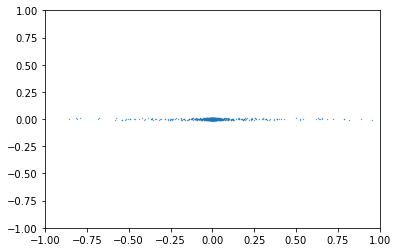

In [4]:
plt.scatter(x, z, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

Done !!!


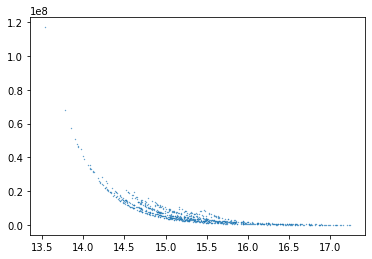

In [5]:
vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

res = []

for i in range(len(x)-NN):
    
    d = (x[i]*x[i] + y[i]*y[i])**0.5

    Jt = 0.
    for k in range(NN):
        Jt += x[i+k]*vy[i+k] - y[i+k]*vx[i+k]

    res.append([d, np.mean(Jt/d)])

res = np.array(res)

d = res[:, 0] * unitLength_in_cm
jt_d = res[:, 1] 

plt.scatter(np.log10(d), jt_d, s = 0.1)

print('Done !!!')

In [6]:
NN = 10
j = 1
filz = np.sort(glob.glob('./Outputs_10k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

## Selecting particles in a thin shell parallel to the x-y plane

delta = 0.05

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

x = x[nz]
y = y[nz]
z = z[nz]

v = v[nz] * unitVelocity_in_cm_per_s

rho =  [2.52149963e-19 2.55984445e-19 2.57326428e-19 ... 7.81179208e-19
 7.83612296e-19 7.98841457e-19]
573


Done !!!


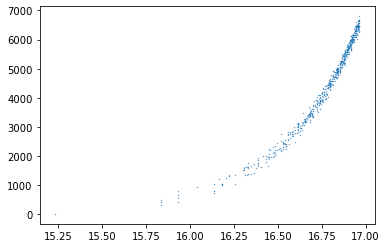

In [7]:
vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

res = []

for i in range(len(x)):
    
    d = (x[i]*x[i] + y[i]*y[i])**0.5

    Jt = x[i]*vy[i] - y[i]*vx[i]

    res.append([d, Jt/d])

res = np.array(res)

d = res[:, 0] * unitLength_in_cm
jt_d = res[:, 1] 

plt.scatter(np.log10(d), jt_d, s = 0.1)

print('Done !!!')